# Exploratory Data Analysis - Sports (Level - Advanced)

_EDA performed by **Nigil Raj PM**._

### Objectives

_● Perform **‘Exploratory Data Analysis’** on dataset **‘Indian Premier League’**._       
_● As a sports analysts, find out the most **Successful Teams, Players** and **Factors contributing Win or loss of a Team.**_      
_● Suggest teams or players a company should **endorse** for its products._          

### Dataset

**● Dataset : https://bit.ly/34SRn3b**

**Importing the Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import category_encoders as ce
import warnings

_Here I'm importing the libraries such as numpy, matplotlib.pyplot, pandas, seaborn, category_encoders and warnings. And I'm going to use these libraries for the Exploratory Data Analysis on this Sports Dataset._

**Ignoring the Warnings**

In [2]:
warnings.filterwarnings(action = 'ignore')

_This will ignore any warnings that may rise._

**Setting the Style of the Plots**

In [3]:
sns.set_style('whitegrid')

_Seaborn set_style will set the aesthetic style of the plots. Here I'm using 'whitegrid'._ 

**Reading the Raw Dataset**

In [4]:
raw_matches = pd.read_csv('matches.csv')

In [5]:
print(raw_matches.shape)
raw_matches.head(3)

(756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [6]:
raw_deliveries = pd.read_csv('deliveries.csv')

In [7]:
print(raw_deliveries.shape)
raw_deliveries.head(3)

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


_These are the Datasets which were given for EDA._

**Processing the _'matches.csv'_ Dataset**

In [8]:
matches = pd.read_csv('matches.csv',
                      header = None,
                      names = ['ID',
                               'Season',
                               'City',
                               'Date',
                               'Team 1',
                               'Team 2',
                               'Toss Winner',
                               'Toss Decision',
                               'Result',
                               'DL Applied',
                               'Winner',
                               'Win by Runs',
                               'Win by Wickets',
                               'Player of Match',
                               'Venue',
                               'Umpire 1',
                               'Umpire 2',
                               'Umpire 3'], 
                      dtype = 'object')

In [9]:
print(matches.shape)
matches.head(3)

(757, 18)


,ID,Season,City,Date,Team 1,Team 2,Toss Winner,Toss Decision,Result,DL Applied,Winner,Win by Runs,Win by Wickets,Player of Match,Venue,Umpire 1,Umpire 2,Umpire 3
0,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


_In this you can see I have given 'header = None' on read_csv and gave names of the columns manually to make it more understandable._

In [10]:
matches = matches.drop([0], 
                       axis = 0)

In [11]:
print(matches.shape)
matches.head(3)

(756, 18)


,ID,Season,City,Date,Team 1,Team 2,Toss Winner,Toss Decision,Result,DL Applied,Winner,Win by Runs,Win by Wickets,Player of Match,Venue,Umpire 1,Umpire 2,Umpire 3
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


_When I gave column names manually in the above cell, the already existing column names convert itself as an row values in the Data Frame, to drop that I have used the drop method from pandas.DataFrame along the axis = 0 ('vertical' or 'row-wise')._

In [12]:
matches.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            747, 748, 749, 750, 751, 752, 753, 754, 755, 756],
           dtype='int64', length=756)

In [13]:
matches.index = pd.RangeIndex(start = 0, 
                              stop = len(matches), 
                              step = 1)

In [14]:
print(matches.shape)
matches.head(3)

(756, 18)


,ID,Season,City,Date,Team 1,Team 2,Toss Winner,Toss Decision,Result,DL Applied,Winner,Win by Runs,Win by Wickets,Player of Match,Venue,Umpire 1,Umpire 2,Umpire 3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


_While dropping a row in the Data Frame the indexes get altered and it starts from 1, but we know the python index starts from 0, so ranging the indexes might helps us to get the index values from 0._

In [15]:
for columns in enumerate(matches.columns, 0):
    print(columns)

(0, 'ID')
(1, 'Season')
(2, 'City')
(3, 'Date')
(4, 'Team 1')
(5, 'Team 2')
(6, 'Toss Winner')
(7, 'Toss Decision')
(8, 'Result')
(9, 'DL Applied')
(10, 'Winner')
(11, 'Win by Runs')
(12, 'Win by Wickets')
(13, 'Player of Match')
(14, 'Venue')
(15, 'Umpire 1')
(16, 'Umpire 2')
(17, 'Umpire 3')


_These are the columns and their indexes in the 'matches.csv' Dataset._ 

In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               756 non-null    object
 1   Season           756 non-null    object
 2   City             749 non-null    object
 3   Date             756 non-null    object
 4   Team 1           756 non-null    object
 5   Team 2           756 non-null    object
 6   Toss Winner      756 non-null    object
 7   Toss Decision    756 non-null    object
 8   Result           756 non-null    object
 9   DL Applied       756 non-null    object
 10  Winner           752 non-null    object
 11  Win by Runs      756 non-null    object
 12  Win by Wickets   756 non-null    object
 13  Player of Match  752 non-null    object
 14  Venue            756 non-null    object
 15  Umpire 1         754 non-null    object
 16  Umpire 2         754 non-null    object
 17  Umpire 3         119 non-null    ob

_These are the general informations or summary about the 'matches.csv' Dataset, which shows the Type of Dataset, Range of Index values, Number of Columns and Column data types._

In [17]:
matches['ID'], matches['Season'], matches['Win by Runs'], matches['Win by Wickets'] = matches['ID'].astype('int64'), matches['Season'].astype('int64'), matches['Win by Runs'].astype('int64'), matches['Win by Wickets'].astype('int64')

_In the Dataset we have columns such as 'ID', 'Season', 'Win by Runs' and 'Win by Wickets'. I'm converting the data types of these columns from 'object' to 'int64' because they were numerical value columns and for further data analysis we need them as 'int' data type._

In [18]:
ds_mat = matches.drop(['Date', 
                       'Umpire 3', 
                       'DL Applied'],
                       axis = 1)

_Here I'm dropping the columns 'Date', 'Umpire 3' and 'DL Applied' along the axis = 1 ('horizontal' or 'column-wise'). Because they were not help us in the data analysis especially 'Umpire 3' column which has only 119 Non-Null values and rest of them are Null values._

In [19]:
ds_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               756 non-null    int64 
 1   Season           756 non-null    int64 
 2   City             749 non-null    object
 3   Team 1           756 non-null    object
 4   Team 2           756 non-null    object
 5   Toss Winner      756 non-null    object
 6   Toss Decision    756 non-null    object
 7   Result           756 non-null    object
 8   Winner           752 non-null    object
 9   Win by Runs      756 non-null    int64 
 10  Win by Wickets   756 non-null    int64 
 11  Player of Match  752 non-null    object
 12  Venue            756 non-null    object
 13  Umpire 1         754 non-null    object
 14  Umpire 2         754 non-null    object
dtypes: int64(4), object(11)
memory usage: 88.7+ KB


_Once again analysing the summary of the Dataset after converting the data types and dropping the columns. Now we have only 15 columns. And some columns might consist of few null values._

In [20]:
ds_mat.isna().sum()

ID                 0
Season             0
City               7
Team 1             0
Team 2             0
Toss Winner        0
Toss Decision      0
Result             0
Winner             4
Win by Runs        0
Win by Wickets     0
Player of Match    4
Venue              0
Umpire 1           2
Umpire 2           2
dtype: int64

_Checking for Null values along column-wise in the Dataset. And we got 7 NaN values in 'City' column, 4 in 'Winner' column, 4 in 'Player of Match' column and 2 in 'Umpire 1' and 'Umpire 2' columns._  

In [21]:
ds_mat.dropna(inplace = True)

_Dropping the Null or NaN values along row-wise in the Dataset._

In [22]:
print('The Number of Records has been dropped because of NaN Values is', matches.shape[0] - ds_mat.shape[0])

The Number of Records has been dropped because of NaN Values is 13


In [23]:
print('Percentage of Records Dropped is %.1f percent of Total Records.' % ((13 / matches.shape[0]) * 100))

Percentage of Records Dropped is 1.7 percent of Total Records.


In [24]:
ds_mat.isna().sum()

ID                 0
Season             0
City               0
Team 1             0
Team 2             0
Toss Winner        0
Toss Decision      0
Result             0
Winner             0
Win by Runs        0
Win by Wickets     0
Player of Match    0
Venue              0
Umpire 1           0
Umpire 2           0
dtype: int64

_Now we transform our few null value Dataset into non-null value Dataset._

In [25]:
print('The new shape of the dataset after dropping the NaN values is', ds_mat.shape)

The new shape of the dataset after dropping the NaN values is (743, 15)


In [26]:
for cols_uni in ds_mat.columns:
    uni = pd.DataFrame(ds_mat[cols_uni].unique(), columns = [cols_uni])
    print(uni)

        ID
0        1
1        2
2        3
3        4
4        6
..     ...
738  11346
739  11347
740  11412
741  11414
742  11415

[743 rows x 1 columns]
    Season
0     2017
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2018
11    2019
              City
0        Hyderabad
1             Pune
2           Rajkot
3           Indore
4           Mumbai
5          Kolkata
6        Bangalore
7            Delhi
8       Chandigarh
9           Kanpur
10          Jaipur
11         Chennai
12       Cape Town
13  Port Elizabeth
14          Durban
15       Centurion
16     East London
17    Johannesburg
18       Kimberley
19    Bloemfontein
20       Ahmedabad
21         Cuttack
22          Nagpur
23      Dharamsala
24           Kochi
25   Visakhapatnam
26          Raipur
27          Ranchi
28       Abu Dhabi
29         Sharjah
30          Mohali
31       Bengaluru
                         Team 1
0           Sunrisers Hyderabad
1         

_Getting the unique values from all columns and by analysing it I come to know that the 'Team names' in the Dataset which has an anomaly that is 'Rising Pune Supergiant' Team has splitted up into two unique values, one is 'Rising Pune Supergiant' and another is 'Rising Pune Supergiant**s**'._

In [27]:
cols = ['Team 1', 'Team 2', 'Toss Winner', 'Winner']
for vals in cols:
    val_coun = pd.DataFrame(ds_mat[vals].value_counts(), columns = [vals])
    print(val_coun)

                             Team 1
Mumbai Indians                   99
Kings XI Punjab                  91
Chennai Super Kings              88
Kolkata Knight Riders            82
Royal Challengers Bangalore      81
Delhi Daredevils                 70
Rajasthan Royals                 67
Sunrisers Hyderabad              60
Deccan Chargers                  43
Pune Warriors                    20
Gujarat Lions                    14
Rising Pune Supergiant            8
Kochi Tuskers Kerala              7
Rising Pune Supergiants           7
Delhi Capitals                    6
                             Team 2
Kolkata Knight Riders            95
Royal Challengers Bangalore      93
Delhi Daredevils                 86
Mumbai Indians                   85
Kings XI Punjab                  84
Rajasthan Royals                 77
Chennai Super Kings              74
Sunrisers Hyderabad              45
Deccan Chargers                  32
Pune Warriors                    25
Gujarat Lions               

_For instance in 'Winner' column the 'Rising Pune Supergiant' count is 10 and 'Rising Pune Supergiant**s** count is 5. And they should be combined, because both are same records but it were misspelled._

In [28]:
to_repl_cols = ['Team 1', 'Team 2', 'Toss Winner', 'Winner']
for repl_cols in to_repl_cols:
    ds_mat[repl_cols] = ds_mat[repl_cols].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'})

_Here I'm replacing the value 'Rising Pune Supergiant**s**' with 'Rising Pune Supergiant' in order to combine the misspelled records in Teams._

In [29]:
ds_mat['Team 1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Delhi Capitals'], dtype=object)

_Now we get the 'Rising Pune Supergiant' Team as one unique value in our Dataset._

**Processing the _'deliveries.csv'_ Dataset**

In [30]:
deliveries = pd.read_csv('deliveries.csv', 
                         header = None,
                         names = ['ID',
                                  'Inning',
                                  'Batting Team',
                                  'Bowling Team',
                                  'Over',
                                  'Ball',
                                  'Batsman',
                                  'Non Striker',
                                  'Bowler',
                                  'Is Super Over',
                                  'Wide Runs',
                                  'Bye Runs',
                                  'Legbye Runs',
                                  'Noball Runs',
                                  'Penalty Runs',
                                  'Batsman Runs',
                                  'Extra Runs',
                                  'Total Runs',
                                  'Player Dismissed',
                                  'Dismissal Kind',
                                  'Fielder'], 
                         dtype = 'object')

In [31]:
print(deliveries.shape)
deliveries.head(3)

(179079, 21)


,ID,Inning,Batting Team,Bowling Team,Over,Ball,Batsman,Non Striker,Bowler,Is Super Over,...,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Player Dismissed,Dismissal Kind,Fielder
0,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [32]:
deliveries = deliveries.drop([0], 
                             axis = 0)

In [33]:
print(deliveries.shape)
deliveries.head(3)

(179078, 21)


,ID,Inning,Batting Team,Bowling Team,Over,Ball,Batsman,Non Striker,Bowler,Is Super Over,...,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Player Dismissed,Dismissal Kind,Fielder
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [34]:
deliveries.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            179069, 179070, 179071, 179072, 179073, 179074, 179075, 179076,
            179077, 179078],
           dtype='int64', length=179078)

In [35]:
deliveries.index = pd.RangeIndex(start = 0, 
                                 stop = len(deliveries), 
                                 step = 1)

In [36]:
print(deliveries.shape)
deliveries.head(3)

(179078, 21)


,ID,Inning,Batting Team,Bowling Team,Over,Ball,Batsman,Non Striker,Bowler,Is Super Over,...,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Player Dismissed,Dismissal Kind,Fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [37]:
for columns in enumerate(deliveries.columns, 0):
    print(columns)

(0, 'ID')
(1, 'Inning')
(2, 'Batting Team')
(3, 'Bowling Team')
(4, 'Over')
(5, 'Ball')
(6, 'Batsman')
(7, 'Non Striker')
(8, 'Bowler')
(9, 'Is Super Over')
(10, 'Wide Runs')
(11, 'Bye Runs')
(12, 'Legbye Runs')
(13, 'Noball Runs')
(14, 'Penalty Runs')
(15, 'Batsman Runs')
(16, 'Extra Runs')
(17, 'Total Runs')
(18, 'Player Dismissed')
(19, 'Dismissal Kind')
(20, 'Fielder')


In [38]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                179078 non-null  object
 1   Inning            179078 non-null  object
 2   Batting Team      179078 non-null  object
 3   Bowling Team      179078 non-null  object
 4   Over              179078 non-null  object
 5   Ball              179078 non-null  object
 6   Batsman           179078 non-null  object
 7   Non Striker       179078 non-null  object
 8   Bowler            179078 non-null  object
 9   Is Super Over     179078 non-null  object
 10  Wide Runs         179078 non-null  object
 11  Bye Runs          179078 non-null  object
 12  Legbye Runs       179078 non-null  object
 13  Noball Runs       179078 non-null  object
 14  Penalty Runs      179078 non-null  object
 15  Batsman Runs      179078 non-null  object
 16  Extra Runs        179078 non-null  obj

In [39]:
deliveries['ID'], deliveries['Inning'], deliveries['Wide Runs'], deliveries['Bye Runs'], deliveries['Legbye Runs'], deliveries['Noball Runs'], deliveries['Penalty Runs'], deliveries['Batsman Runs'], deliveries['Extra Runs'], deliveries['Total Runs'] = deliveries['ID'].astype('int64'), deliveries['Inning'].astype('int64'), deliveries['Wide Runs'].astype('int64'), deliveries['Bye Runs'].astype('int64'), deliveries['Legbye Runs'].astype('int64'), deliveries['Noball Runs'].astype('int64'), deliveries['Penalty Runs'].astype('int64'), deliveries['Batsman Runs'].astype('int64'), deliveries['Extra Runs'].astype('int64'), deliveries['Total Runs'].astype('int64')

In [40]:
deliveries = deliveries.drop(['Over', 
                              'Ball', 
                              'Batsman', 
                              'Non Striker', 
                              'Bowler', 
                              'Is Super Over', 
                              'Player Dismissed', 
                              'Dismissal Kind', 
                              'Fielder'],
                             axis = 1)

In [41]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            179078 non-null  int64 
 1   Inning        179078 non-null  int64 
 2   Batting Team  179078 non-null  object
 3   Bowling Team  179078 non-null  object
 4   Wide Runs     179078 non-null  int64 
 5   Bye Runs      179078 non-null  int64 
 6   Legbye Runs   179078 non-null  int64 
 7   Noball Runs   179078 non-null  int64 
 8   Penalty Runs  179078 non-null  int64 
 9   Batsman Runs  179078 non-null  int64 
 10  Extra Runs    179078 non-null  int64 
 11  Total Runs    179078 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 16.4+ MB


In [42]:
deliveries.isna().sum()

ID              0
Inning          0
Batting Team    0
Bowling Team    0
Wide Runs       0
Bye Runs        0
Legbye Runs     0
Noball Runs     0
Penalty Runs    0
Batsman Runs    0
Extra Runs      0
Total Runs      0
dtype: int64

_Till this the same data processing work which was already done in 'matches.csv' Dataset has been executed. But here the records are different, It has more than 1 lakh rows and 21 columns and It has null values in 'Player Dismissed', 'Dismissal Kind' and 'Fielder' columns. And those columns are not going to help us further in our data analysis, so simply dropping them and going with the useful features from the Dataset is better and other columns doesn't have any null values._

_On the following process I'm splitting the whole 'deliveries.csv' Dataset into two parts, because it has too many records with respect to the columns such as 'Over', 'Ball', 'Batsman', 'Non Striker' and 'Bowler', these columns are already dropped so I'm going to group the remaining columns with respect to their 'ID', and finally we can combine both the grouped splits of the Dataset in order to get the better Dataset than before._

In [43]:
deliveries_split1 = deliveries.iloc[:, :4]

In [44]:
deliveries_split1.head(3)

,ID,Inning,Batting Team,Bowling Team
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore


In [45]:
deliveries_split1_grpby = deliveries_split1.groupby(['ID', 'Inning', 'Batting Team', 'Bowling Team'])

In [46]:
list_grouped = []
for grouped, grouping_used_values in deliveries_split1_grpby:
    print(grouped, grouping_used_values)
    list_grouped.append(grouped)

(1, 1, 'Sunrisers Hyderabad', 'Royal Challengers Bangalore')      ID  Inning         Batting Team                 Bowling Team
0     1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
1     1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
2     1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
3     1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
4     1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
..   ..     ...                  ...                          ...
120   1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
121   1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
122   1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
123   1       1  Sunrisers Hyderabad  Royal Challengers Bangalore
124   1       1  Sunrisers Hyderabad  Royal Challengers Bangalore

[125 rows x 4 columns]
(1, 2, 'Royal Challengers Bangalore', 'Sunrisers Hyderabad')      ID  Inning                 Batting Team         Bowling T

_When an instance object assign to DataFrameGroupBy method, then the object consist of two values one is 'grouped value' and another one is 'values used for grouping'. Here the requirement for further proceeding is 'grouped value' because I have grouped with all the columns in 'deliveries_split1' considering they all contain many same records along rows._

In [47]:
list_grouped

[(1, 1, 'Sunrisers Hyderabad', 'Royal Challengers Bangalore'),
 (1, 2, 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'),
 (2, 1, 'Mumbai Indians', 'Rising Pune Supergiant'),
 (2, 2, 'Rising Pune Supergiant', 'Mumbai Indians'),
 (3, 1, 'Gujarat Lions', 'Kolkata Knight Riders'),
 (3, 2, 'Kolkata Knight Riders', 'Gujarat Lions'),
 (4, 1, 'Rising Pune Supergiant', 'Kings XI Punjab'),
 (4, 2, 'Kings XI Punjab', 'Rising Pune Supergiant'),
 (5, 1, 'Royal Challengers Bangalore', 'Delhi Daredevils'),
 (5, 2, 'Delhi Daredevils', 'Royal Challengers Bangalore'),
 (6, 1, 'Gujarat Lions', 'Sunrisers Hyderabad'),
 (6, 2, 'Sunrisers Hyderabad', 'Gujarat Lions'),
 (7, 1, 'Kolkata Knight Riders', 'Mumbai Indians'),
 (7, 2, 'Mumbai Indians', 'Kolkata Knight Riders'),
 (8, 1, 'Royal Challengers Bangalore', 'Kings XI Punjab'),
 (8, 2, 'Kings XI Punjab', 'Royal Challengers Bangalore'),
 (9, 1, 'Delhi Daredevils', 'Rising Pune Supergiant'),
 (9, 2, 'Rising Pune Supergiant', 'Delhi Daredevils'),
 (10, 1,

_List of Grouped Values._

In [48]:
deliveries_split1_new = pd.DataFrame(list_grouped, columns = ['ID', 'Inning', 'Batting Team', 'Bowling Team'])

In [49]:
deliveries_split1_new.head(3)

,ID,Inning,Batting Team,Bowling Team
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad
2,2,1,Mumbai Indians,Rising Pune Supergiant


_Making a Data Frame for the list of tuples which consist of Grouped values._

In [50]:
deliveries_split2 = deliveries.groupby(['ID', 'Inning']).sum()

In [51]:
deliveries_split2.head(3)

Wide Runs  Bye Runs  Legbye Runs  Noball Runs  Penalty Runs  \
ID Inning                                                                
1  1               5         0            1            1             0   
   2               4         0            1            1             0   
2  1               6         1            1            0             0   

           Batsman Runs  Extra Runs  Total Runs  
ID Inning                                        
1  1                200           7         207  
   2                166           6         172  
2  1                176           8         184

_This is the second split of the 'deliveries.csv' Dataset, where I have grouped by summing up the column values with respect to thier 'ID' and 'Inning' columns._

In [52]:
deliveries_split2_new = deliveries_split2.reset_index()

In [53]:
deliveries_split2_new.head(3)

,ID,Inning,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
0,1,1,5,0,1,1,0,200,7,207
1,1,2,4,0,1,1,0,166,6,172
2,2,1,6,1,1,0,0,176,8,184


_Resetting the Index values in order to get the range of index start from 0, and it also doesn't lose the 'ID' and 'Inning' index values, now we get them as column values._

In [54]:
ds_del = deliveries_split2_new.merge(deliveries_split1_new)

In [55]:
print(ds_del.shape)
ds_del.head(3)

(1528, 12)


,ID,Inning,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Batting Team,Bowling Team
0,1,1,5,0,1,1,0,200,7,207,Sunrisers Hyderabad,Royal Challengers Bangalore
1,1,2,4,0,1,1,0,166,6,172,Royal Challengers Bangalore,Sunrisers Hyderabad
2,2,1,6,1,1,0,0,176,8,184,Mumbai Indians,Rising Pune Supergiant


_This 'ds_del' is the processed Dataset ('deliveries.csv') and it is far better to understand than the previous one._

In [56]:
ds_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 1527
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1528 non-null   int64 
 1   Inning        1528 non-null   int64 
 2   Wide Runs     1528 non-null   int64 
 3   Bye Runs      1528 non-null   int64 
 4   Legbye Runs   1528 non-null   int64 
 5   Noball Runs   1528 non-null   int64 
 6   Penalty Runs  1528 non-null   int64 
 7   Batsman Runs  1528 non-null   int64 
 8   Extra Runs    1528 non-null   int64 
 9   Total Runs    1528 non-null   int64 
 10  Batting Team  1528 non-null   object
 11  Bowling Team  1528 non-null   object
dtypes: int64(10), object(2)
memory usage: 155.2+ KB


_Short Summary of the ds_del Dataset, which contains no null values along columns._

In [57]:
for cols_uni in ds_del.columns:
    uni = pd.DataFrame(ds_del[cols_uni].unique(), columns = [cols_uni])
    print(uni)

        ID
0        1
1        2
2        3
3        4
4        5
..     ...
751  11347
752  11412
753  11413
754  11414
755  11415

[756 rows x 1 columns]
   Inning
0       1
1       2
2       3
3       4
4       5
    Wide Runs
0           5
1           4
2           6
3           3
4           2
5          11
6           9
7           0
8           7
9           1
10         13
11         10
12          8
13         15
14         12
15         14
16         18
17         16
18         19
   Bye Runs
0         0
1         1
2         4
3         2
4         3
5         8
6         5
7         6
8         7
9         9
    Legbye Runs
0             1
1             2
2             0
3             5
4             4
5             3
6             6
7             9
8             7
9            11
10            8
11           10
12           12
13           16
14           13
15           14
   Noball Runs
0            1
1            0
2            3
3            2
4            4
5         

_Here also the Dataset contain Team names in 'Batting Team' and 'Bowling Team' columns, which has two unique values that is 'Rising Pune Supergiant' and 'Rising Pune Supergiant**s**'. We know that both are same records but they were misspelled, so that the same process 'replacing' has been executed._

In [58]:
cols = ['Batting Team', 'Bowling Team']
for vals in cols:
    val_coun = pd.DataFrame(ds_del[vals].value_counts(), columns = [vals])
    print(val_coun)

                             Batting Team
Mumbai Indians                        189
Royal Challengers Bangalore           182
Kolkata Knight Riders                 181
Kings XI Punjab                       178
Chennai Super Kings                   165
Delhi Daredevils                      162
Rajasthan Royals                      149
Sunrisers Hyderabad                   110
Deccan Chargers                        75
Pune Warriors                          45
Gujarat Lions                          31
Delhi Capitals                         17
Rising Pune Supergiant                 16
Kochi Tuskers Kerala                   14
Rising Pune Supergiants                14
                             Bowling Team
Mumbai Indians                        189
Kolkata Knight Riders                 181
Royal Challengers Bangalore           181
Kings XI Punjab                       178
Chennai Super Kings                   165
Delhi Daredevils                      161
Rajasthan Royals                  

In [59]:
to_repl_cols = ['Batting Team', 'Bowling Team']
for repl_cols in to_repl_cols:
    ds_del[repl_cols] = ds_del[repl_cols].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'})

In [60]:
ds_del['Batting Team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

_Now we get the 'Rising Pune Supergiant' Team as one unique value in our Dataset._

**Quick Preview of Processed Datasets**

In [61]:
print(ds_mat.shape)
ds_mat.head(1)

(743, 15)


,ID,Season,City,Team 1,Team 2,Toss Winner,Toss Decision,Result,Winner,Win by Runs,Win by Wickets,Player of Match,Venue,Umpire 1,Umpire 2
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [62]:
print(ds_del.shape)
ds_del.head(1)

(1528, 12)


,ID,Inning,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Batting Team,Bowling Team
0,1,1,5,0,1,1,0,200,7,207,Sunrisers Hyderabad,Royal Challengers Bangalore


_All set to go to find the Sucessful 'Teams', 'Players' and Factors contributing 'Win or loss' of a Team._

**Sucessful Teams in IPL**

_When it comes to sucess their season-wise performance and overall performance should be consider. Because a team may drop their potential in one season and they might perform well in another season. So finding out the season-wise and overall performances will gives us the better conclusion about the sucessful teams._

**Season-Wise**

In [63]:
lis_seas = []
for uni_seas in ds_mat['Season'].unique():
    lis_seas.append(uni_seas)
    lis_seas.sort()

In [64]:
teams_seas = ds_mat.iloc[:, [1, 8]]

In [65]:
teams_seas.head(3)

,Season,Winner
0,2017,Sunrisers Hyderabad
1,2017,Rising Pune Supergiant
2,2017,Kolkata Knight Riders


In [66]:
teams_seas_grp = teams_seas.groupby('Season')

_Grouping the values in 'teams_seas' DataFrame with respect to their 'Season'._

In [67]:
print(lis_seas)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


_Unique Seasons in the Dataset._

In [68]:
def team_colors(season):
    seas = pd.DataFrame(season['Teams'])
    seas['Teams'] = seas['Teams'].replace({'Sunrisers Hyderabad' : 'darkorange',
                                           'Rising Pune Supergiant' : 'indigo',
                                           'Kolkata Knight Riders' : 'purple',
                                           'Kings XI Punjab' : 'silver',
                                           'Mumbai Indians' : 'tab:blue',
                                           'Delhi Daredevils' : 'steelblue',
                                           'Gujarat Lions' : 'orangered',
                                           'Royal Challengers Bangalore' : 'red',
                                           'Chennai Super Kings' : 'gold',
                                           'Rajasthan Royals' : 'hotpink',
                                           'Deccan Chargers' : 'peru',
                                           'Pune Warriors' : 'cyan',
                                           'Kochi Tuskers Kerala' : 'orange',
                                           'Delhi Capitals' : 'navy'})
    team_colors = list(seas['Teams'].values)
    return team_colors

_'team_colors' function can be called to represent the color of the teams._

In [69]:
def teams_seas_barplot(season, title, color):
    plt.bar(x = list(range(0, len(season))), 
            height = season['Winner'],
            width = 0.8,
            color = color,
            edgecolor = 'black')
    plt.xticks(list(range(0, len(season))), 
               labels = season['Teams'], 
               rotation = 'vertical')
    plt.title('Sucessful Teams in ' + title)
    plt.xlabel('Teams')
    plt.ylabel('Number of Winnings')
    plt.tight_layout()
    plt.show()

_'teams_seas_barplot' function can be used to plot the bar graphs._

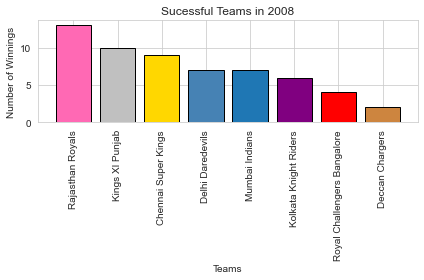

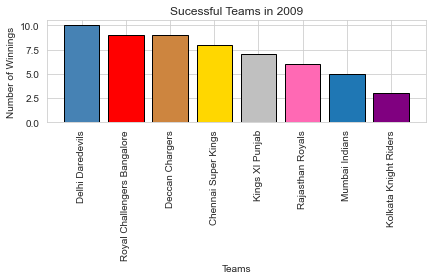

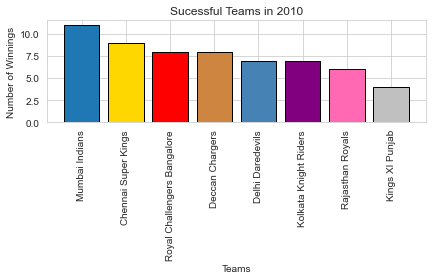

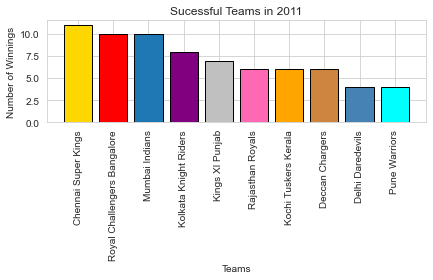

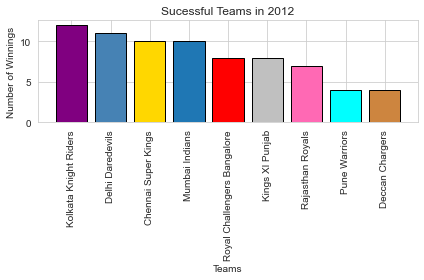

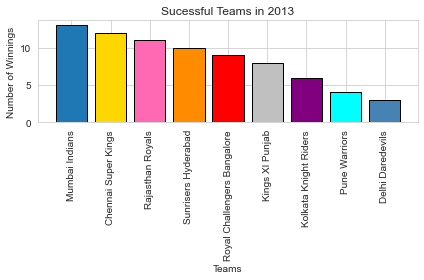

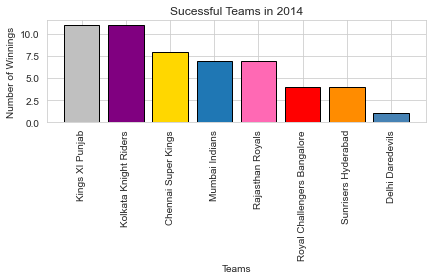

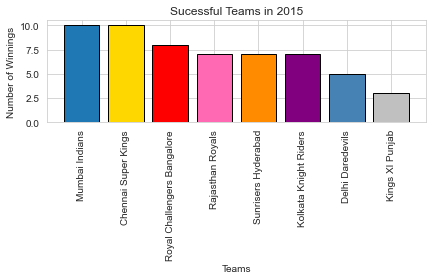

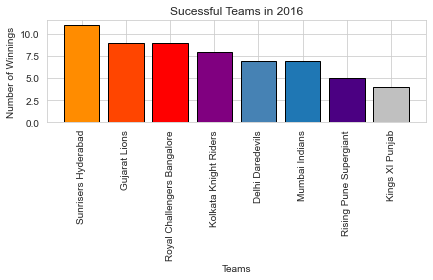

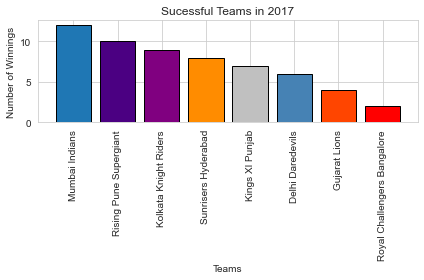

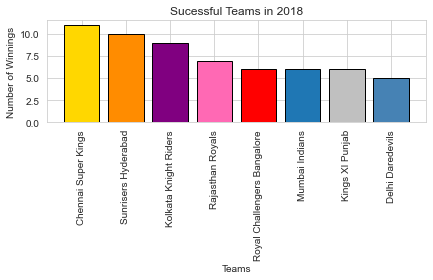

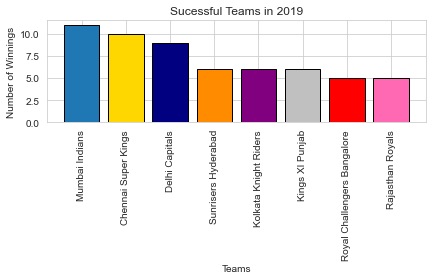

In [70]:
for n_seas in lis_seas:
    teams_seas = teams_seas_grp.get_group(n_seas)
    teams_seas_count = pd.DataFrame(teams_seas['Winner'].value_counts().sort_values(ascending = False))
    teams_seas_ds = teams_seas_count.rename_axis('Teams').reset_index()
    teams_seas_barplot(teams_seas_ds, str(n_seas), team_colors(teams_seas_ds))

_From the above bar plots we can point out the top teams season-wise._

**Over-all**

In [71]:
teams_ovr_count = pd.DataFrame(ds_mat['Winner'].value_counts().sort_values(ascending = False))
teams_ovr_ds = teams_ovr_count.rename_axis('Teams').reset_index()

In [72]:
def teams_ovr_barplot(overall, title, color):
    plt.figure(figsize = (16, 5))
    plt.bar(x = list(range(0, len(overall))), 
            height = overall['Winner'], 
            width = 0.8,
            color = color,
            edgecolor = 'black')
    plt.xticks(list(range(0, len(overall))), 
               labels = overall['Teams'], 
               rotation = 'vertical')
    plt.title('Sucessful Teams in ' + title)
    plt.xlabel('Teams')
    plt.ylabel('Number of Winnings')
    plt.tight_layout()
    plt.savefig('Sucessful Teams in Over-all Seasons.jpg')
    plt.show()

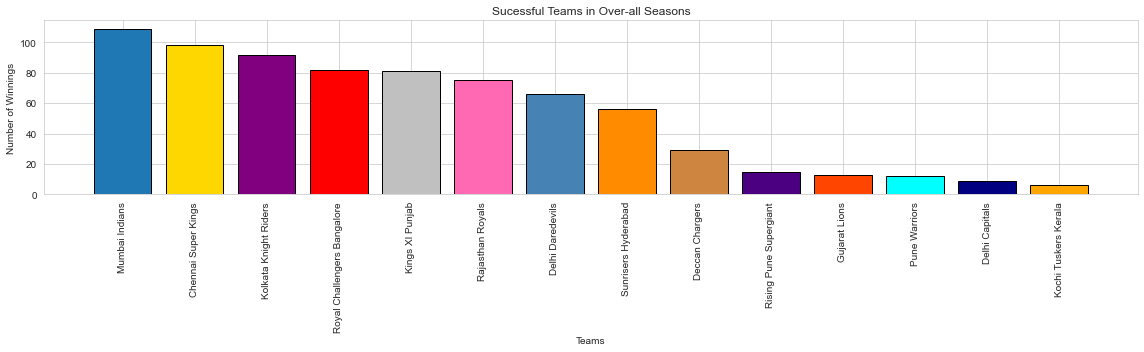

In [73]:
teams_ovr_barplot(teams_ovr_ds, 'Over-all Seasons', team_colors(teams_ovr_ds))

_By analysing this, we can clearly conclude that the top team is 'Mumbai Indians' because they have won the most number of matches and they had appeared in top 4 positions in 7 out of 12 seasons. Followingly 'Chennai Super Kings' have won the most number of matches next to 'Mumbai Indians', and in season-wise they hadn't play for two years (2016 and 2017) but still 10 out of 10 seasons they had held on top 4 positions. So my sucessful inference about the Sucessful teams is 'Mumbai Indians' and 'Chennai Super Kings' are the best and Sucessful teams in IPL._

**Sucessful Players in IPL**

_This is similar to the sucessful teams analysis, finding out the season-wise and overall performance of the players will gives us the better conclusion about the sucessful players._

**Season-Wise**

In [74]:
play_seas = ds_mat.iloc[:, [1, 11]]

In [75]:
play_seas.head(3)

,Season,Player of Match
0,2017,Yuvraj Singh
1,2017,SPD Smith
2,2017,CA Lynn


In [76]:
play_seas_grp = play_seas.groupby('Season')

_Grouping the values in 'play_seas' DataFrame with respect to their 'Season'._

In [77]:
print(lis_seas)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [78]:
def play_seas_barplot(season, title):
    plt.bar(x = list(range(0, len(season))), 
            height = season['Player of Match'], 
            width = 0.8,
            color = 'slategrey',
            edgecolor = 'black')
    plt.xticks(list(range(0, len(season))), 
               labels = season['Player'], 
               rotation = 'vertical')
    plt.title('Sucessful Players in ' + title)
    plt.xlabel('Players')
    plt.ylabel('Number of Player of Match Winnings')
    plt.tight_layout()
    plt.show()

_'play_seas_barplot' function can be used to plot the bar graphs._

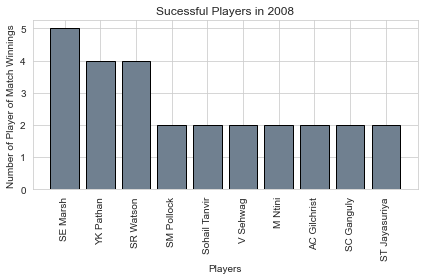

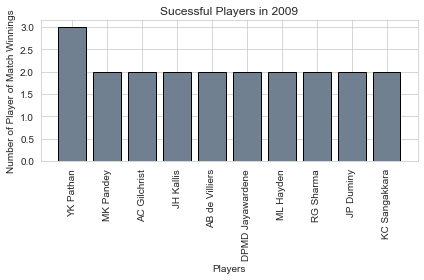

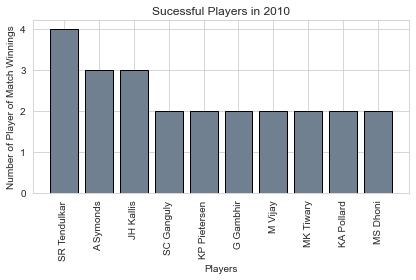

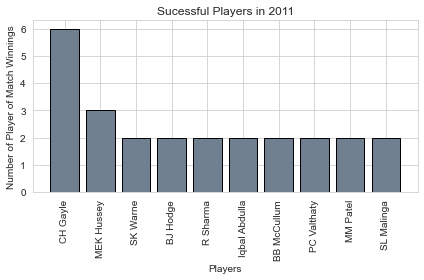

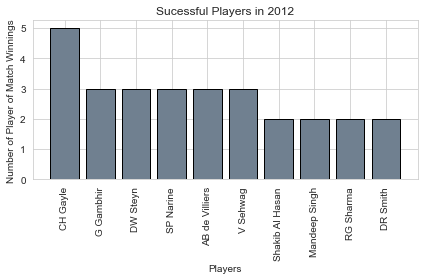

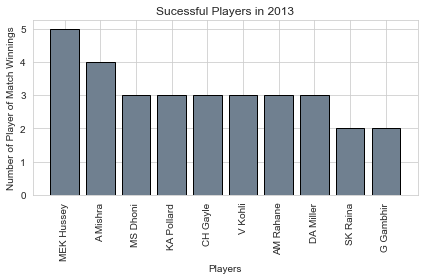

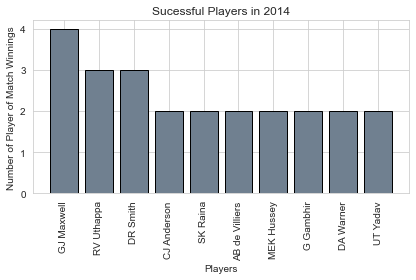

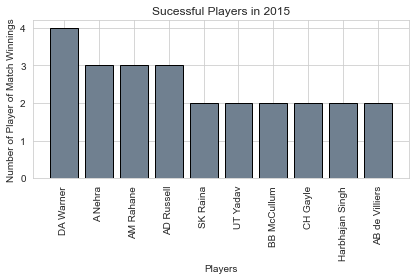

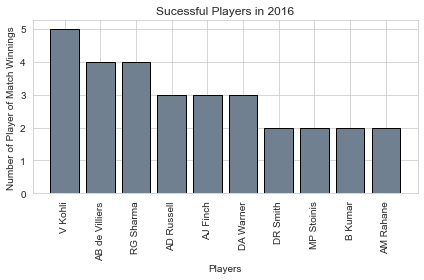

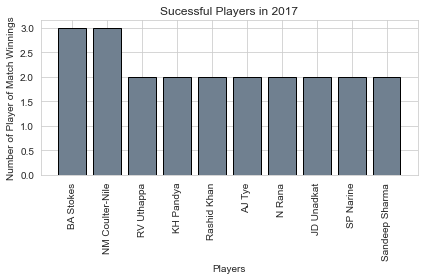

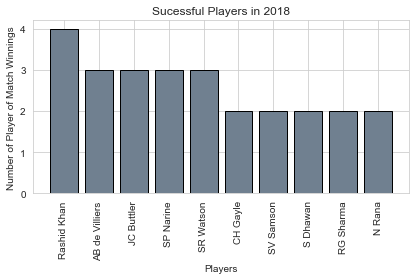

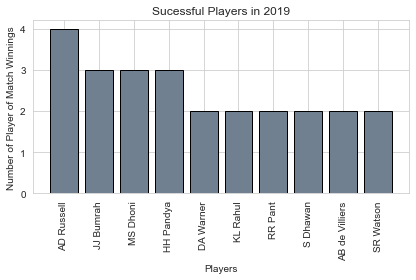

In [79]:
for n_seas in lis_seas:
    play_seas = play_seas_grp.get_group(n_seas)
    play_seas_count = pd.DataFrame(play_seas['Player of Match'].value_counts().sort_values(ascending = False))
    play_seas_count_lar = play_seas_count.nlargest(n = 10, columns = ['Player of Match'])
    play_seas_ds = play_seas_count_lar.rename_axis('Player').reset_index()
    play_seas_barplot(play_seas_ds, str(n_seas))

_From the above bar plots we can point out the top players season-wise._

**Over-all**

In [80]:
play_ovr_count = pd.DataFrame(ds_mat['Player of Match'].value_counts().sort_values(ascending = False))
play_ovr_count_lar = play_ovr_count.nlargest(n = 15, columns = ['Player of Match'])
play_ovr_ds = play_ovr_count_lar.rename_axis('Players').reset_index()

In [81]:
def play_ovr_barplot(overall, title):
    plt.figure(figsize = (16, 5))
    plt.bar(x = list(range(0, len(overall))), 
            height = overall['Player of Match'], 
            width = 0.8,
            color = 'slategrey',
            edgecolor = 'black')
    plt.xticks(list(range(0, len(overall))), 
               labels = overall['Players'], 
               rotation = 'vertical')
    plt.title('Sucessful Players in ' + title)
    plt.xlabel('Players')
    plt.ylabel('Number of Player of Match Winnings')
    plt.tight_layout()
    plt.savefig('Sucessful Players in Over-all Seasons.jpg')
    plt.show()

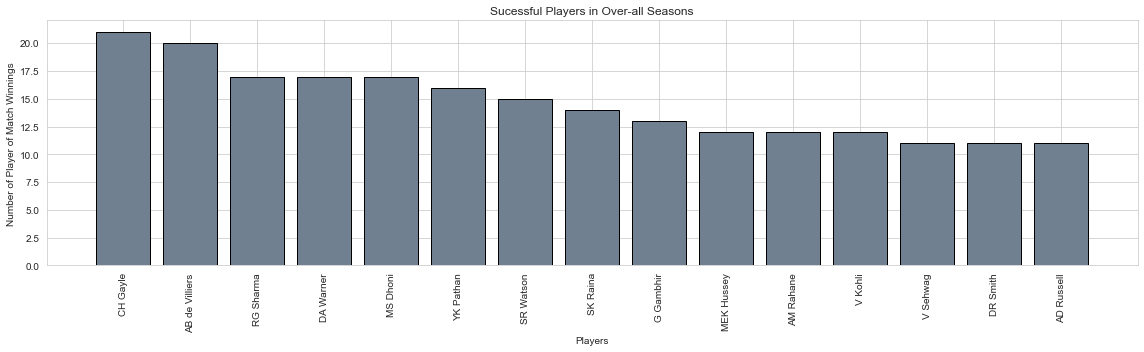

In [82]:
play_ovr_barplot(play_ovr_ds, 'Over-all Seasons')

_If a player perform well in a match then he would be awarded as the 'Player of Match', considering this in mind we can find the Sucessful player in IPL. And by analysing this barplot, we can clearly conclude that the top player is 'CH Gayle' because he has won the most number of Player of Match awards in over-all seasons, but the wonder is that he had appeared only in 5 out of 12 seasons in top 10 positions (2011, 2012, 2013, 2015 and 2018). And followingly 'AB de Villiers', 'RG Sharma', 'MS Dhoni' and 'DA Warner' have also won the most number of 'Player of Match' awards next to 'CH Gayle'. And my inference is that this Top 5 players are the most sucessful players in IPL._

**Suggesting Teams or Players a Company should Endorse for its Products**

_Definetely my suggestion for a company is that they can surely endorse the players 'RG Sharma' and 'MS Dhoni' for their product promotions because they were in teams like 'Mumbai Indians' and 'Chennai Super Kings' which are the sucessful teams and also they held on top 5 positions in over-all sucessful players, so they might be helpful for their product promotions._

**Factors contributing Win or Loss of a Team**

In [83]:
ds_mat_new = matches.drop(['Date',
                           'Umpire 1',
                           'Umpire 2',
                           'Umpire 3', 
                           'DL Applied'], 
                          axis = 1)

In [84]:
ds_del_new = ds_del.drop(['Inning', 
                          'Batting Team', 
                          'Bowling Team'], 
                         axis = 1)
ds_del_new_grp = ds_del_new.groupby('ID').sum()
ds_del_new = ds_del_new_grp.reset_index()

In [85]:
if ds_mat_new.shape[0] == ds_del_new.shape[0]:
    print('You can Merge it !')
else:
    print('Change the Shape of the Datasets.')

You can Merge it !


_Dropping the unnecessary columns from the datasets and ensuring their shape before merging the datasets._

In [86]:
ds = ds_mat_new.merge(ds_del_new)
ds.head(3)

,ID,Season,City,Team 1,Team 2,Toss Winner,Toss Decision,Result,Winner,Win by Runs,...,Player of Match,Venue,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,...,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",9,0,2,2,0,366,13,379
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,...,SPD Smith,Maharashtra Cricket Association Stadium,9,1,2,0,0,359,12,371
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,...,CA Lynn,Saurashtra Cricket Association Stadium,13,4,2,0,0,348,19,367


In [87]:
for columns in enumerate(ds.columns, 0):
    print(columns)

(0, 'ID')
(1, 'Season')
(2, 'City')
(3, 'Team 1')
(4, 'Team 2')
(5, 'Toss Winner')
(6, 'Toss Decision')
(7, 'Result')
(8, 'Winner')
(9, 'Win by Runs')
(10, 'Win by Wickets')
(11, 'Player of Match')
(12, 'Venue')
(13, 'Wide Runs')
(14, 'Bye Runs')
(15, 'Legbye Runs')
(16, 'Noball Runs')
(17, 'Penalty Runs')
(18, 'Batsman Runs')
(19, 'Extra Runs')
(20, 'Total Runs')


In [88]:
ds.shape

(756, 21)

In [89]:
ds.isna().sum()

ID                 0
Season             0
City               7
Team 1             0
Team 2             0
Toss Winner        0
Toss Decision      0
Result             0
Winner             4
Win by Runs        0
Win by Wickets     0
Player of Match    4
Venue              0
Wide Runs          0
Bye Runs           0
Legbye Runs        0
Noball Runs        0
Penalty Runs       0
Batsman Runs       0
Extra Runs         0
Total Runs         0
dtype: int64

In [90]:
ds.dropna(inplace = True)

In [91]:
ds.shape

(745, 21)

In [92]:
to_repl_cols = ['Team 1', 'Team 2', 'Toss Winner', 'Winner']
for repl_cols in to_repl_cols:
    ds[repl_cols] = ds[repl_cols].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'})

_After merging the datasets as usual we check for Null values, here we have few null values in 'City', 'Winner' and 'Player of Match' columns. Those values are get dropped and we get a new shape of the 'ds' dataset and finally 'Rising Pune Supergiant**s**' is replaced with 'Rising Pune Supergiant'._

In [93]:
encode_teams = ce.OrdinalEncoder(mapping = [{'col' : 'Team 1', 
                                             'mapping' : {'Sunrisers Hyderabad' : 0,
                                                          'Rising Pune Supergiant' : 1,
                                                          'Kolkata Knight Riders' : 2,
                                                          'Kings XI Punjab' : 3,
                                                          'Mumbai Indians' : 4,
                                                          'Delhi Daredevils' : 5,
                                                          'Gujarat Lions' : 6,
                                                          'Royal Challengers Bangalore' : 7,
                                                          'Chennai Super Kings' : 8,
                                                          'Rajasthan Royals' : 9,
                                                          'Deccan Chargers' : 10,
                                                          'Pune Warriors' : 11,
                                                          'Kochi Tuskers Kerala' : 12,
                                                          'Delhi Capitals' : 13}}, 
                                            {'col' : 'Team 2', 
                                             'mapping' : {'Sunrisers Hyderabad' : 0,
                                                          'Rising Pune Supergiant' : 1,
                                                          'Kolkata Knight Riders' : 2,
                                                          'Kings XI Punjab' : 3,
                                                          'Mumbai Indians' : 4,
                                                          'Delhi Daredevils' : 5,
                                                          'Gujarat Lions' : 6,
                                                          'Royal Challengers Bangalore' : 7,
                                                          'Chennai Super Kings' : 8,
                                                          'Rajasthan Royals' : 9,
                                                          'Deccan Chargers' : 10,
                                                          'Pune Warriors' : 11,
                                                          'Kochi Tuskers Kerala' : 12,
                                                          'Delhi Capitals' : 13}}, 
                                            {'col' : 'Toss Winner', 
                                             'mapping' : {'Sunrisers Hyderabad' : 0,
                                                          'Rising Pune Supergiant' : 1,
                                                          'Kolkata Knight Riders' : 2,
                                                          'Kings XI Punjab' : 3,
                                                          'Mumbai Indians' : 4,
                                                          'Delhi Daredevils' : 5,
                                                          'Gujarat Lions' : 6,
                                                          'Royal Challengers Bangalore' : 7,
                                                          'Chennai Super Kings' : 8,
                                                          'Rajasthan Royals' : 9,
                                                          'Deccan Chargers' : 10,
                                                          'Pune Warriors' : 11,
                                                          'Kochi Tuskers Kerala' : 12,
                                                          'Delhi Capitals' : 13}}, 
                                            {'col' : 'Winner', 
                                             'mapping' : {'Sunrisers Hyderabad' : 0,
                                                          'Rising Pune Supergiant' : 1,
                                                          'Kolkata Knight Riders' : 2,
                                                          'Kings XI Punjab' : 3,
                                                          'Mumbai Indians' : 4,
                                                          'Delhi Daredevils' : 5,
                                                          'Gujarat Lions' : 6,
                                                          'Royal Challengers Bangalore' : 7,
                                                          'Chennai Super Kings' : 8,
                                                          'Rajasthan Royals' : 9,
                                                          'Deccan Chargers' : 10,
                                                          'Pune Warriors' : 11,
                                                          'Kochi Tuskers Kerala' : 12,
                                                          'Delhi Capitals' : 13}}])
encode_othr = ce.OrdinalEncoder()

In [94]:
ds = encode_teams.fit_transform(ds)
ds = encode_othr.fit_transform(ds)

In [95]:
ds.head(3)

,ID,Season,City,Team 1,Team 2,Toss Winner,Toss Decision,Result,Winner,Win by Runs,...,Player of Match,Venue,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
0,1,2017,1,0,7,7,1,1,0,35,...,1,1,9,0,2,2,0,366,13,379
1,2,2017,2,4,1,1,1,1,1,0,...,2,2,9,1,2,0,0,359,12,371
2,3,2017,3,6,2,2,1,1,2,0,...,3,3,13,4,2,0,0,348,19,367


In [96]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               745 non-null    int64
 1   Season           745 non-null    int64
 2   City             745 non-null    int32
 3   Team 1           745 non-null    int32
 4   Team 2           745 non-null    int32
 5   Toss Winner      745 non-null    int32
 6   Toss Decision    745 non-null    int32
 7   Result           745 non-null    int32
 8   Winner           745 non-null    int32
 9   Win by Runs      745 non-null    int64
 10  Win by Wickets   745 non-null    int64
 11  Player of Match  745 non-null    int32
 12  Venue            745 non-null    int32
 13  Wide Runs        745 non-null    int64
 14  Bye Runs         745 non-null    int64
 15  Legbye Runs      745 non-null    int64
 16  Noball Runs      745 non-null    int64
 17  Penalty Runs     745 non-null    int64
 18  Batsman Ru

In [97]:
ds = ds.astype('int64')
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               745 non-null    int64
 1   Season           745 non-null    int64
 2   City             745 non-null    int64
 3   Team 1           745 non-null    int64
 4   Team 2           745 non-null    int64
 5   Toss Winner      745 non-null    int64
 6   Toss Decision    745 non-null    int64
 7   Result           745 non-null    int64
 8   Winner           745 non-null    int64
 9   Win by Runs      745 non-null    int64
 10  Win by Wickets   745 non-null    int64
 11  Player of Match  745 non-null    int64
 12  Venue            745 non-null    int64
 13  Wide Runs        745 non-null    int64
 14  Bye Runs         745 non-null    int64
 15  Legbye Runs      745 non-null    int64
 16  Noball Runs      745 non-null    int64
 17  Penalty Runs     745 non-null    int64
 18  Batsman Ru

_Encoding the categorical data into ordinal numerical data and converting the data type of the features in 'ds' dataset._

In [98]:
ds.describe()

,ID,Season,City,Team 1,Team 2,Toss Winner,Toss Decision,Result,Winner,Win by Runs,...,Player of Match,Venue,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1797.108725,2013.430872,9.971812,5.335570,5.467114,5.554362,1.387919,1.012081,5.302013,13.444295,...,84.260403,12.467114,8.720805,1.170470,5.012081,0.990604,0.013423,296.406711,15.907383,312.314094
std,3469.000006,3.382968,7.677156,3.198224,3.163859,3.181357,0.487603,0.109319,3.143317,23.599650,...,61.659046,9.935102,4.482332,1.810717,3.228921,1.197519,0.258890,55.456073,6.030011,56.072803
min,1.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,2.000000,135.000000
25%,187.000000,2011.000000,6.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,0.000000,...,30.000000,6.000000,5.000000,0.000000,3.000000,0.000000,0.000000,264.000000,12.000000,279.000000
50%,374.000000,2013.000000,8.000000,5.000000,5.000000,5.000000,1.000000,1.000000,5.000000,0.000000,...,70.000000,8.000000,8.000000,0.000000,4.000000,1.000000,0.000000,299.000000,15.000000,315.000000
75%,568.000000,2016.000000,12.000000,8.000000,8.000000,8.000000,2.000000,1.000000,8.000000,19.000000,...,136.000000,16.000000,11.000000,1.000000,7.000000,2.000000,0.000000,333.000000,20.000000,349.000000
max,11415.000000,2019.000000,32.000000,13.000000,13.000000,13.000000,2.000000,2.000000,13.000000,146.000000,...,226.000000,40.000000,27.000000,11.000000,19.000000,8.000000,5.000000,459.000000,38.000000,471.000000


In [99]:
des_stat = pd.DataFrame(ds.describe().iloc[7, :], columns = ['max'])
des_stat

,max
ID,11415.0
Season,2019.0
City,32.0
Team 1,13.0
Team 2,13.0
Toss Winner,13.0
Toss Decision,2.0
Result,2.0
Winner,13.0
Win by Runs,146.0


_Generating the descriptive statistical details of the dataset. In this the 'max' values of certain columns can be useful to make some inference about the data such as maximum of 'Win by Runs' is 146 runs (might be considered as a record in T'20 format) and maximum of 'Win by Wickets' is 10 wickets._

In [100]:
corr = ds.corr()

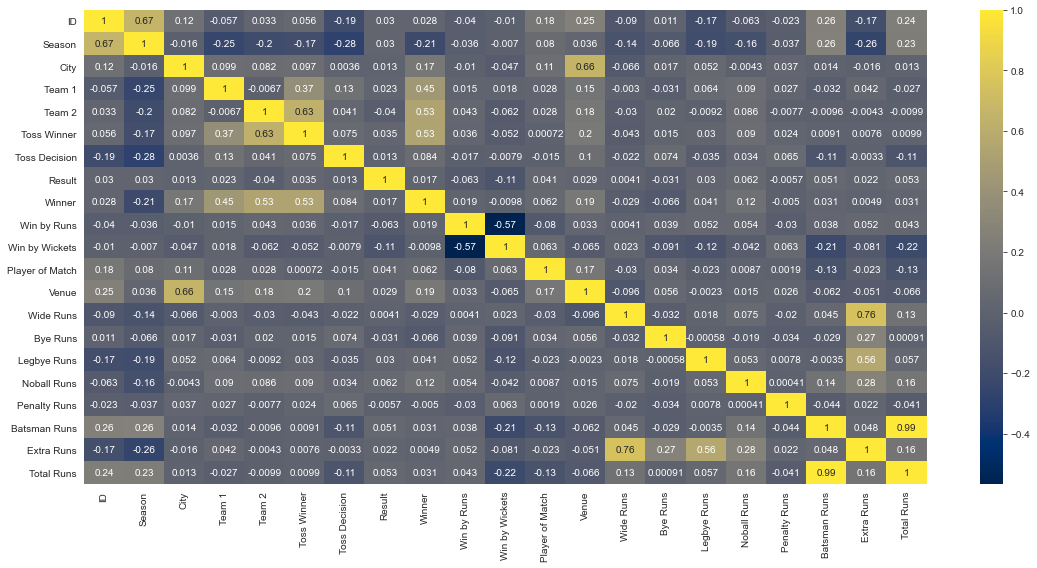

In [101]:
plt.figure(figsize = (16, 8))
sns.heatmap(data = corr, 
            annot = True, 
            cmap = 'cividis')
plt.tight_layout()
plt.savefig('Correlations.jpg')

_When two columns of data are strongly linked together we say they have a high correlation. Correlation is positive when the columns are proportional with each other and correlation is negative when the columns are not proportional with each other. With the help of correlation we can easily find the factors contributing for win or loss of a team._

In [102]:
for columns in enumerate(corr.columns, 0):
    print(columns)

(0, 'ID')
(1, 'Season')
(2, 'City')
(3, 'Team 1')
(4, 'Team 2')
(5, 'Toss Winner')
(6, 'Toss Decision')
(7, 'Result')
(8, 'Winner')
(9, 'Win by Runs')
(10, 'Win by Wickets')
(11, 'Player of Match')
(12, 'Venue')
(13, 'Wide Runs')
(14, 'Bye Runs')
(15, 'Legbye Runs')
(16, 'Noball Runs')
(17, 'Penalty Runs')
(18, 'Batsman Runs')
(19, 'Extra Runs')
(20, 'Total Runs')


In [103]:
win_fac = corr.iloc[:, [8, 9, 10, 20]]

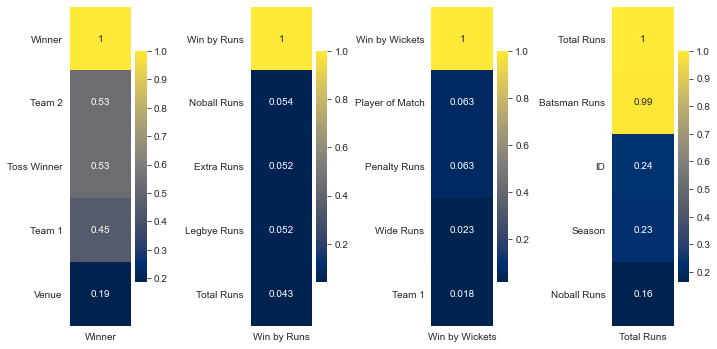

In [104]:
winner = pd.DataFrame(win_fac['Winner'].sort_values(ascending = False))
winner = winner.nlargest(n = 5, columns = ['Winner'])
winbyruns = pd.DataFrame(win_fac['Win by Runs'].sort_values(ascending = False))
winbyruns = winbyruns.nlargest(n = 5, columns = ['Win by Runs'])
winbywickets = pd.DataFrame(win_fac['Win by Wickets'].sort_values(ascending = False))
winbywickets = winbywickets.nlargest(n = 5, columns = ['Win by Wickets'])
totalruns = pd.DataFrame(win_fac['Total Runs'].sort_values(ascending = False))
totalruns = totalruns.nlargest(n = 5, columns = ['Total Runs'])

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 5))

sns.heatmap(winner, annot = True, ax = ax[0], cmap = 'cividis')
sns.heatmap(winbyruns, annot = True, ax = ax[1], cmap = 'cividis') 
sns.heatmap(winbywickets, annot = True, ax = ax[2], cmap = 'cividis')
sns.heatmap(totalruns, annot = True, ax = ax[3], cmap = 'cividis')
fig.tight_layout()
plt.savefig('Factors contributing Win or Loss of a Team.jpg')

_These are the top 5 correlations of 'Winner', 'Win by Runs', 'Win by Wickets' and 'Total Runs' columns. From this analysis we can conclude that the toss winning team has won the most number of matches and the extra runs contribution is considered as a major part in winning of a team and finally the player of match (well played player in a match) contribution is important for a team to win. So these are the main factors which are contributing for a win or loss of a team._

_**Till this the given task objectives has successfully completed.**_ 

_● Perform **‘Exploratory Data Analysis’** on dataset **‘Indian Premier League’**._  ✅     
_● As a sports analysts, find out the most **Successful Teams, Players** and **Factors contributing Win or loss of a Team.**_  ✅     
_● Suggest teams or players a company should **endorse** for its products._  ✅        

_**Followingly I have also performed some more analysis in this dataset.**_

**Highest Score**

In [105]:
print('Index of the Highest Total Runs is', ds_del['Total Runs'].idxmax())

Index of the Highest Total Runs is 829


In [106]:
ds_del.iloc[829, :]

ID                                      411
Inning                                    1
Wide Runs                                 6
Bye Runs                                  0
Legbye Runs                               3
Noball Runs                               2
Penalty Runs                              0
Batsman Runs                            252
Extra Runs                               11
Total Runs                              263
Batting Team    Royal Challengers Bangalore
Bowling Team                  Pune Warriors
Name: 829, dtype: object

_Highest score in IPL is 263 by 'Royal Challengers Bangalore' against 'Pune Warriors'._

**Top 10 Highest Scores**

In [107]:
high_scores = ds_del.nlargest(n = 10, columns = ['Total Runs'])
high_scores.head(3)

,ID,Inning,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Batting Team,Bowling Team
829,411,1,6,0,3,2,0,252,11,263,Royal Challengers Bangalore,Pune Warriors
1370,7937,1,5,0,0,0,0,245,5,250,Kolkata Knight Riders,Kings XI Punjab
1250,620,1,1,1,1,1,0,244,4,248,Royal Challengers Bangalore,Gujarat Lions


In [108]:
def team_colors_1(scores):
    score = pd.DataFrame(scores['Batting Team'])
    score['Batting Team'] = score['Batting Team'].replace({'Sunrisers Hyderabad' : 'darkorange',
                                                           'Rising Pune Supergiant' : 'indigo',
                                                           'Kolkata Knight Riders' : 'purple',
                                                           'Kings XI Punjab' : 'silver',
                                                           'Mumbai Indians' : 'tab:blue',
                                                           'Delhi Daredevils' : 'steelblue',
                                                           'Gujarat Lions' : 'orangered',
                                                           'Royal Challengers Bangalore' : 'red',
                                                           'Chennai Super Kings' : 'gold',
                                                           'Rajasthan Royals' : 'hotpink',
                                                           'Deccan Chargers' : 'peru',
                                                           'Pune Warriors' : 'cyan',
                                                           'Kochi Tuskers Kerala' : 'orange',
                                                           'Delhi Capitals' : 'navy'})
    team_colors_1 = list(score['Batting Team'].values)
    return team_colors_1

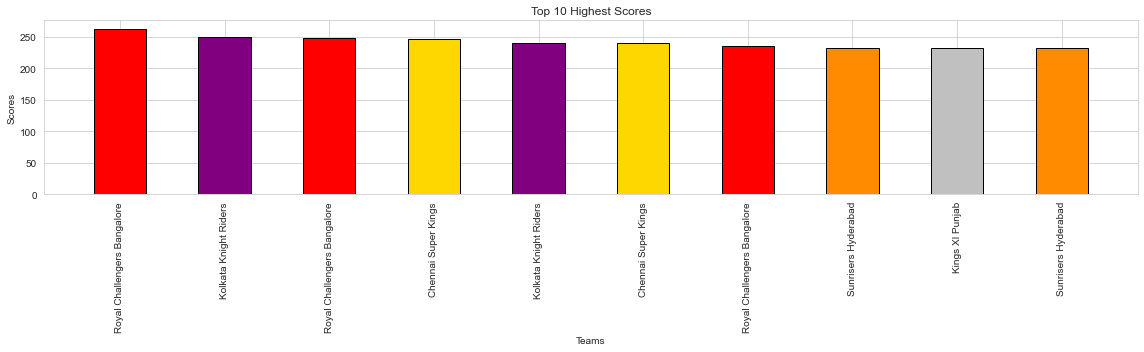

In [109]:
plt.figure(figsize = (16, 5))
plt.bar(x = list(range(0, len(high_scores))), 
        height = high_scores['Total Runs'], 
        width = 0.5, 
        color = team_colors_1(high_scores), 
        edgecolor = 'black')
plt.xticks(list(range(0, len(high_scores))), 
           labels = high_scores['Batting Team'], 
           rotation = 'vertical')
plt.title('Top 10 Highest Scores')
plt.xlabel('Teams')
plt.ylabel('Scores')
plt.tight_layout()
plt.savefig('Top 10 Highest Scores.jpg')
plt.show()

_Visualising the top 10 highest scores in IPL._

**Highest Scores in IPL - Source : https://www.mykhel.com/cricket/highest-team-score-in-ipl-rs94/** 

_Our Highest Score results are most probably correct while comparing with this above source._

**Lowest Score**

In [110]:
print('Index of the Lowest Total Runs is', ds_del['Total Runs'].idxmin())

Index of the Lowest Total Runs is 1153


In [111]:
ds_del.iloc[1153, :]

ID                                      571
Inning                                    2
Wide Runs                                 0
Bye Runs                                  0
Legbye Runs                               0
Noball Runs                               0
Penalty Runs                              0
Batsman Runs                              2
Extra Runs                                0
Total Runs                                2
Batting Team    Royal Challengers Bangalore
Bowling Team               Delhi Daredevils
Name: 1153, dtype: object

**Lowest Scores in IPL - Source : https://www.mykhel.com/cricket/lowest-team-score-in-ipl-rs95/** 

_We get a lowest score as '2' but the lowest score in IPL is '49' (referred from the above source), so finding out the reason for this poor result is important._

In [112]:
lowest = []
for uni_low in ds_del['Total Runs'].unique():
    if (uni_low < 49):
        lowest.append(uni_low)

In [113]:
print(lowest)

[11, 6, 48, 15, 18, 9, 10, 20, 44, 2, 7, 42]


_Few scores less than '49' has been takes place in our Dataset._  

_Followingly I have found out the reason for this few scores._

In [114]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            179078 non-null  int64 
 1   Inning        179078 non-null  int64 
 2   Batting Team  179078 non-null  object
 3   Bowling Team  179078 non-null  object
 4   Wide Runs     179078 non-null  int64 
 5   Bye Runs      179078 non-null  int64 
 6   Legbye Runs   179078 non-null  int64 
 7   Noball Runs   179078 non-null  int64 
 8   Penalty Runs  179078 non-null  int64 
 9   Batsman Runs  179078 non-null  int64 
 10  Extra Runs    179078 non-null  int64 
 11  Total Runs    179078 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 16.4+ MB


In [115]:
deliveries.groupby('Inning').count()

,ID,Batting Team,Bowling Team,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
Inning,,,,,,,,,,,
1,92742,92742,92742,92742,92742,92742,92742,92742,92742,92742,92742
2,86240,86240,86240,86240,86240,86240,86240,86240,86240,86240,86240
3,50,50,50,50,50,50,50,50,50,50,50
4,38,38,38,38,38,38,38,38,38,38,38
5,8,8,8,8,8,8,8,8,8,8,8


_We have 5 Innings, in that we get total runs as 2 from the 2nd Inning. Actually we should have the records in 2nd Inning as same as that of the 1st Inning, but we have less records in 2nd Inning that's why we get a poor result for the lowest score._

_We get the lowest score as 2 at 'ID' 571, The reason behind this is,_

In [116]:
print("deliveries['ID'] is monotonic -", deliveries['ID'].is_monotonic)

deliveries['ID'] is monotonic - True


_'monotonic' - If it is either entirely non-increasing, or entirely non-decreasing. We should be aware of this before converting a column as an Index object. Because for categorical or discrete values pd.Index.get_loc method will return the boolean outputs._

In [117]:
ID = pd.Index(deliveries['ID'])
print(ID)

Int64Index([    1,     1,     1,     1,     1,     1,     1,     1,     1,
                1,
            ...
            11415, 11415, 11415, 11415, 11415, 11415, 11415, 11415, 11415,
            11415],
           dtype='int64', name='ID', length=179078)


In [118]:
ID.get_loc(571)

slice(135039, 135169, None)

In [119]:
ID_571 = []
for n in range(135039, 135169):
    ID_571.append(deliveries.iloc[n])

In [120]:
vals_571 = pd.DataFrame(ID_571)
vals_571.head(3)

,ID,Inning,Batting Team,Bowling Team,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
135039,571,1,Delhi Daredevils,Royal Challengers Bangalore,0,0,0,0,0,1,0,1
135040,571,1,Delhi Daredevils,Royal Challengers Bangalore,0,0,0,0,0,0,0,0
135041,571,1,Delhi Daredevils,Royal Challengers Bangalore,0,0,0,0,0,1,0,1


In [121]:
vals_571.groupby('Inning').count()

,ID,Batting Team,Bowling Team,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs
Inning,,,,,,,,,,,
1,123,123,123,123,123,123,123,123,123,123,123
2,7,7,7,7,7,7,7,7,7,7,7


_Here we have only 7 records in 2nd Innings of a match, that's why this ID gives us a poor lowest score result._  

_But still I have found the lowest score by a team, by eliminating the scores which are less than '49', and the results are most probably correct while comparing with the above source._

In [122]:
for i in range(0, len(ds_del['Total Runs'])):
    if ds_del['Total Runs'].values[i] < 49:
        ds_del['Total Runs'] = ds_del['Total Runs'].drop([i], axis = 0)

In [123]:
ds_del['Total Runs'].unique()

array([207., 172., 184., 187., 183., 163., 164., 157., 142., 135., 140.,
       178., 180., 148., 150., 205., 108., 158., 159., 170., 171., 145.,
       155., 188., 137., 176., 177., 161., 134., 168., 169., 154., 213.,
       192., 191., 198., 199., 128., 179., 162., 131.,  49., 160., 182.,
       181.,  96., 153.,  nan,  67.,  68., 209., 165., 167., 185., 189.,
       208., 214., 138., 119., 136., 212.,  66., 195., 197., 230., 223.,
       173.,  73.,  78., 151., 107., 111., 129., 222.,  82., 240., 132.,
       166., 110., 112., 143., 202., 217., 116., 147., 152., 196., 133.,
       109., 126., 127., 144., 103., 104., 124., 141., 122., 204., 156.,
       221., 194., 118.,  94., 149.,  55., 175., 211., 201., 174., 146.,
        87.,  58., 101.,  79., 139.,  95., 100., 105., 123., 125., 113.,
       120., 102.,  92., 190., 203., 218.,  93., 121., 246., 115., 200.,
       186., 130.,  86.,  99., 193.,  81.,  85., 231., 117.,  74., 114.,
        61.,  89.,  97.,  98., 232.,  56., 215.,  8

_Here we can see a Nan value as a unique value in this column, but it won't affect our analysis so leaving them as it is will prevent from the changing of shape of the column._

In [124]:
ds_del['Total Runs'].shape

(1528,)

In [125]:
print('Index of the Lowest Total Runs is', ds_del['Total Runs'].idxmin())

Index of the Lowest Total Runs is 53


In [126]:
ds_del.iloc[53, :]

ID                                       27
Inning                                    2
Wide Runs                                 2
Bye Runs                                  0
Legbye Runs                               3
Noball Runs                               2
Penalty Runs                              0
Batsman Runs                             42
Extra Runs                                7
Total Runs                               49
Batting Team    Royal Challengers Bangalore
Bowling Team          Kolkata Knight Riders
Name: 53, dtype: object

_Lowest score in IPL is 49 by 'Royal Challengers Bangalore' against 'Kolkata Knight Riders'._

**Top 10 Lowest Scores**

In [127]:
low_scores = ds_del.nsmallest(n = 10, columns = ['Total Runs'])
low_scores.head(3)

,ID,Inning,Wide Runs,Bye Runs,Legbye Runs,Noball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Batting Team,Bowling Team
53,27,2,2,0,3,2,0,42,7,49.0,Royal Challengers Bangalore,Kolkata Knight Riders
207,103,2,3,0,1,0,0,51,4,55.0,Chennai Super Kings,Kolkata Knight Riders
606,301,1,1,0,3,1,0,51,5,56.0,Delhi Daredevils,Pune Warriors


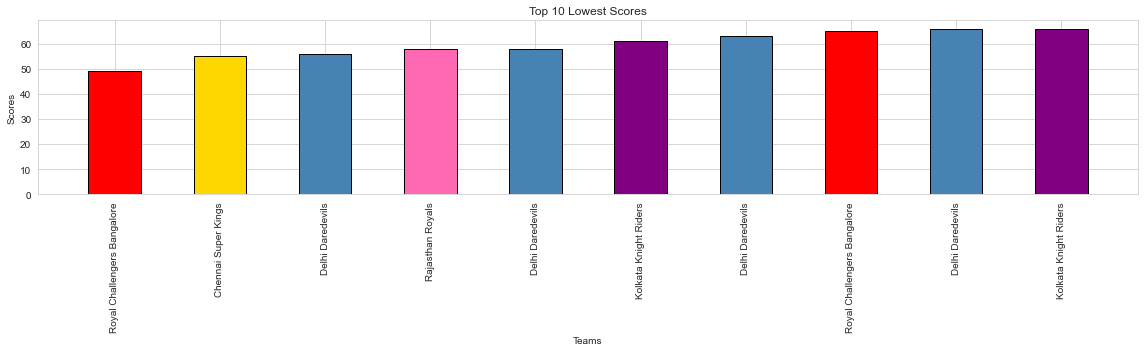

In [128]:
plt.figure(figsize = (16, 5))
plt.bar(x = list(range(0, len(low_scores))), 
        height = low_scores['Total Runs'], 
        width = 0.5, 
        color = team_colors_1(low_scores), 
        edgecolor = 'black')
plt.xticks(list(range(0, len(low_scores))), 
           labels = low_scores['Batting Team'], 
           rotation = 'vertical')
plt.title('Top 10 Lowest Scores')
plt.xlabel('Teams')
plt.ylabel('Scores')
plt.tight_layout()
plt.savefig('Top 10 Lowest Scores.jpg')
plt.show()

_Visualising the top 10 Lowest scores in IPL._

_Our Lowest Score results are most probably correct while comparing with the above source._

**Win by Runs vs Win by Wickets**

In [129]:
wins = ds_mat.iloc[:, [9, 10]]
wins.head(3)

,Win by Runs,Win by Wickets
0,35,0
1,0,7
2,0,10


In [130]:
wins['Win by Runs'] = wins['Win by Runs'].replace({0 : np.nan})
wins['Win by Wickets'] = wins['Win by Wickets'].replace({0 : np.nan})
wins.head(3)

,Win by Runs,Win by Wickets
0,35.0,NaN
1,NaN,7.0
2,NaN,10.0


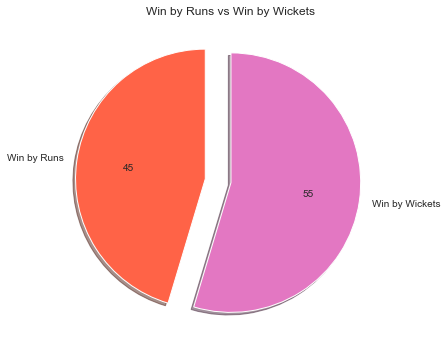

In [131]:
plt.figure(figsize = (16, 5))
plt.pie([wins['Win by Runs'].count(), wins['Win by Wickets'].count()], 
        labels = ['Win by Runs', 'Win by Wickets'], 
        autopct = '%.0f',
        shadow = True,
        startangle = 90,
        colors = ['tomato', 'tab:pink'],
        explode = [0.2, 0])
plt.title('Win by Runs vs Win by Wickets')
plt.tight_layout()
plt.savefig('Win by Runs vs Win by Wickets.jpg')
plt.show()

_Second Batting team has won the most number of matches than First Batting team in IPL._

**Toss Decision - Fielding vs Batting**

In [132]:
toss_dec = pd.DataFrame(ds_mat['Toss Decision'].value_counts())
toss_dec = toss_dec.reset_index()
toss_dec = toss_dec.rename(columns = {'index' : 'Toss Decision', 'Toss Decision' : 'Counts'})
toss_dec.head(3)

,Toss Decision,Counts
0,field,455
1,bat,288


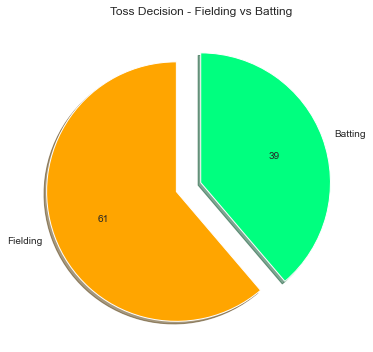

In [133]:
plt.figure(figsize = (16, 5))
plt.pie([toss_dec['Counts'].values[0], toss_dec['Counts'].values[1]],
        labels = ['Fielding', 'Batting'], 
        autopct = '%.0f',
        shadow = True,
        startangle = 90,
        colors = ['orange', 'springgreen'],
        explode = [0.2, 0])
plt.title('Toss Decision - Fielding vs Batting')
plt.tight_layout()
plt.savefig('Toss Decision - Fielding vs Batting.jpg')
plt.show()

_Most of the teams have chose Fielding as Toss Decision in IPL._

**City with Most Number of Matches**

In [134]:
cities = pd.DataFrame(ds_mat['City'].value_counts())
cities = cities.reset_index()
cities = cities.rename(columns = {'index' : 'City', 'City' : 'Counts'})
cities = cities.nlargest(n = 10, columns = ['Counts'])
cities.head(3)

,City,Counts
0,Mumbai,101
1,Kolkata,77
2,Delhi,73


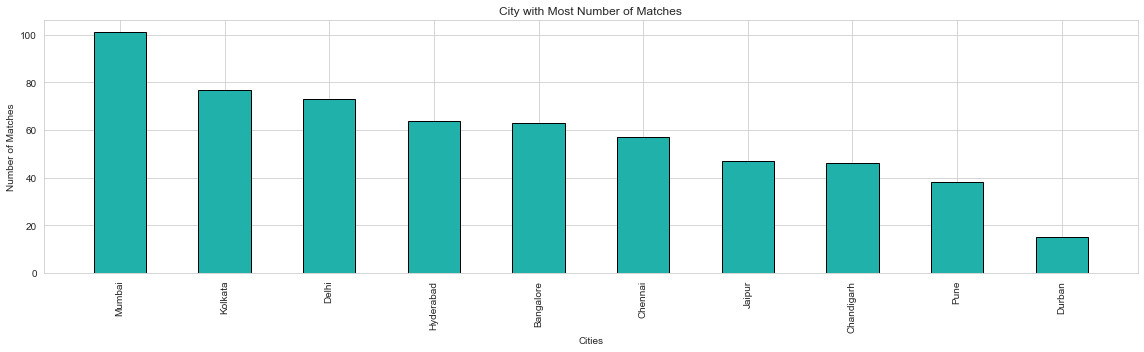

In [135]:
plt.figure(figsize = (16, 5))
plt.bar(x = list(range(0, len(cities))), 
        height = cities['Counts'], 
        width = 0.5, 
        color = 'lightseagreen', 
        edgecolor = 'black')
plt.xticks(list(range(0, len(cities))), 
           labels = cities['City'], 
           rotation = 'vertical')
plt.title('City with Most Number of Matches')
plt.xlabel('Cities')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.savefig('City with Most Number of Matches.jpg')
plt.show()

_Visualising the top 10 Cities with Most Number of Matches in IPL._

**Season-wise Highest Extra Runs**

In [136]:
extra_runs = ds.iloc[:, [1, 19]]
extra_runs_grp = extra_runs.groupby('Season').sum()
extra_runs_1 = extra_runs_grp.reset_index()
extra_runs_1 = extra_runs_1.nlargest(n = 5, columns = ['Extra Runs'])
extra_runs_1.head(3)

,Season,Extra Runs
3,2011,1221
4,2012,1131
2,2010,1129


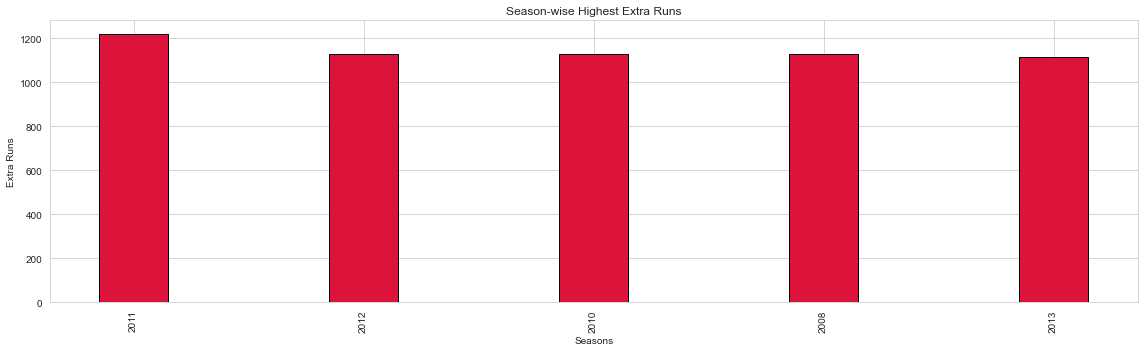

In [137]:
plt.figure(figsize = (16, 5))
plt.bar(x = list(range(0, len(extra_runs_1))), 
        height = extra_runs_1['Extra Runs'], 
        width = 0.3, 
        color = 'crimson', 
        edgecolor = 'black')
plt.xticks(list(range(0, len(extra_runs_1))), 
           labels = extra_runs_1['Season'], 
           rotation = 'vertical')
plt.title('Season-wise Highest Extra Runs')
plt.xlabel('Seasons')
plt.ylabel('Extra Runs')
plt.tight_layout()
plt.savefig('Season-wise Highest Extra Runs.jpg')
plt.show()

_Visualising the top 5 Seasons with Highest Extra Runs in IPL._

### Thank You !